In [1]:
#import BeautifulSoup

import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
# Request from URL
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=New+York+State&start=70')
r

<Response [200]>

In [3]:
#print headers and content

print r.headers
print r.content

{'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked', 'Set-Cookie': 'CTK=1avf97557a395cuc; Domain=.indeed.com; Expires=Mon, 24-Oct-2033 15:01:47 GMT; Path=/, ctkgen=1; Expires=Wed, 19-Oct-2016 20:16:16 GMT; Path=/, JSESSIONID=916082972154385548C07FE32B90039C.jasxA_ord-job23; Path=/; HttpOnly, INDEED_CSRF_TOKEN=gcM7Y3jatTAdfLr9aaGCrUl0bFOJNxQs; Path=/, PREF=""; Domain=.indeed.com; Expires=Thu, 01-Jan-1970 00:00:10 GMT; Path=/, PREF="TM=1476907996344:L=New+York+State"; Version=1; Max-Age=536870911; Expires=Mon, 24-Oct-2033 15:01:47 GMT; Path=/, RQ="q=data+scientist&l=New+York+State"; Version=1; Max-Age=2592000; Expires=Fri, 18-Nov-2016 20:13:16 GMT; Path=/, UD="LA=1476907996:CV=1476907996:TS=1476907996:SG=42be632f219a0b819ac026bd01b416c6"; Version=1; Max-Age=536870911; Expires=Mon, 24-Oct-2033 15:01:47 GMT; Path=/, BIGipServerjob=!t/ErXZD2NyWUI80/0rl98CFw+W0yBpbJOTO0y6gEYkJjHcD+WiaQ3YdP34ph5RR/8YG3EAnqWvlaN3A=; path=/', 'Vary': 'User-Agent,Acce

In [4]:
# Use BeautifulSoup

insoup = BeautifulSoup(r.content,'lxml')

In [5]:
# function for getting location from indeed

def extract_location_from_result(loc):
    try:
        for n in loc.findAll(class_='location'):
            return n.text.strip()
    except:
        return 'None'

In [6]:
extract_location_from_result(insoup)

u'New York, NY'

In [7]:
# function for getting job title from indeed

def extract_jobtitle_from_result(jobtitle):
    try:
        for n in jobtitle.findAll(class_='jobtitle'):
            return n.text.strip()
    except:
        return 'None' 

In [8]:
extract_jobtitle_from_result(insoup)

u'Machine Learning Quantitative Analyst'

In [9]:
# function for getting company from indeed

def extract_company_from_result(comp):
    try:
        for n in comp.findAll(class_='company'):
            return n.text.strip()
    except:
        return 'None' 

In [10]:
extract_company_from_result(insoup)

u'Bloomberg'

In [11]:
# function to get salary from indeed

def extract_salary_from_result(sal):
    try:
        for n in sal.findAll('td', class_='snip'):
            return n.nobr
    except:
        return 'None'  

In [12]:
extract_salary_from_result(insoup)

In [13]:
# function to get summary/description from indeed

def extract_summary_from_result(desc):
    try:
        for n in desc.findAll('span', class_='summary'):
            return n.text.strip()
    except:
        return 'None' 

In [14]:
extract_summary_from_result(insoup)

u'The Machine Learning Quantitative Analyst will work in Bloomberg\u2019s Enterprise Solutions area and work collaboratively to build a liquidity tool for banks,...'

In [15]:
#Get each list from each page and 

Location = []
Job_Title = []
Company = []
Salary = []
Description = []

url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 1000
cities = ['New+York', 'Chicago', 'Boston', 'San+Francisco', 'Los+Angeles', 'Austin', 'Atlanta']
results = []
for city in set(cities):
    for start in range(0, max_results_per_city, 10):
        url = url_template.format(city,start)
        ru = requests.get(url)
        indeed = BeautifulSoup(ru.content, "lxml")
        for item in indeed.findAll('div', class_='result'):
            Location.append(extract_location_from_result(item))
            Job_Title.append(extract_jobtitle_from_result(item))
            Company.append(extract_company_from_result(item))
            Salary.append(extract_salary_from_result(item))
            Description.append(extract_summary_from_result(item))

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame([Location,Job_Title,Company,Salary,Description]).T 

In [18]:
df.columns= ['Location','Job_Title','Company','Salary','Description']

In [19]:
df.head()

,Location,Job_Title,Company,Salary,Description
0,"Austin, TX 78731",Data Engineer,Indeed,None,Work closely with stakeholders on the data dem...
1,"Austin, TX 78759",Senior Data Scientist - Geospatial Analytics,MaxPoint,None,Senior Data Scientist – Geospatial Analytics. ...
2,"Austin, TX 78731",Data Scientist,Indeed,None,How a Data Scientist works. As a Data Scientis...
3,"Austin, TX",Research Scientist,University of Texas at Austin,"<nobr>$4,584 a month</nobr>",Provide statistical support on research and su...
4,"Austin, TX",Staff Data Scientist,HomeAway,None,Experience in processing and analyzing Big dat...


In [20]:
#Cleaning Salary Column

df['Salary'].unique()

array([None, <nobr>$4,584 a month</nobr>,
       <nobr>$6,250 - $10,833 a month</nobr>,
       <nobr>$4,599 - $6,066 a month</nobr>, <nobr>$6,667 a month</nobr>,
       <nobr>$5,541 a month</nobr>, <nobr>$5,400 - $6,500 a month</nobr>,
       <nobr>$4,000 a month</nobr>, <nobr>$3,520 - $4,600 a month</nobr>,
       <nobr>$5,259 - $8,624 a month</nobr>,
       <nobr>$140,000 - $160,000 a year</nobr>,
       <nobr>$23.44 - $29.80 an hour</nobr>,
       <nobr>$5,259 - $6,941 a month</nobr>,
       <nobr>$45,000 - $55,000 a year</nobr>,
       <nobr>$4,500 - $4,900 a month</nobr>,
       <nobr>$120,000 - $150,000 a year</nobr>,
       <nobr>$60,000 - $80,000 a year</nobr>, <nobr>$130,000 a year</nobr>,
       <nobr>$90,000 a year</nobr>, <nobr>$5,500 - $7,500 a month</nobr>,
       <nobr>$3,519 a month</nobr>, <nobr>$80,000 - $110,000 a year</nobr>,
       <nobr>$180,000 a year</nobr>, <nobr>$150,000 a year</nobr>,
       <nobr>$110,000 a year</nobr>,
       <nobr>$104,674 - $151,358 a yea

In [21]:
# Remove columns with 'None' in Salary

df = df[df.Salary.notnull()]

In [22]:
#Convert Salary column to a string

df['Salary'] = df['Salary'].apply(lambda x: str(x))

In [23]:
# Remove $ and , in Salary

df['Salary'] = df['Salary'].apply(lambda x: x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x: x.replace(',',''))

In [24]:
# Remove nobr tags from Salary

df['Salary'] = df['Salary'].apply(lambda x: x.replace('<nobr>',''))
df['Salary'] = df['Salary'].apply(lambda x: x.replace('</nobr>',''))

In [25]:
# Reset index

df = df.reset_index(drop=True)

In [26]:
# Parse yearly, monthly, hourly salaries

df['hourly_sal'] = df['Salary'].map(lambda x: 1 if 'hour' in x else 0)
df['monthly_sal'] = df['Salary'].map(lambda x: 1 if 'month' in x else 0)
df['yearly_sal'] = df['Salary'].map(lambda x: 1 if 'year' in x else 0)


In [27]:
# Drop monthly and hourly salaries
df_year1 = df[df.monthly_sal != 1]
df_year = df_year1[df.hourly_sal !=1]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [28]:
# drop columns hourly_sal, monthly_sal, and yearly_sal
df_year = df_year.drop('hourly_sal', axis=1)
df_year = df_year.drop('monthly_sal', axis=1)
df_year = df_year.drop('yearly_sal', axis=1)

In [29]:
# reset index and set dataframe to df
df = df_year.reset_index(drop=True)

In [30]:
# remove a year and - in Salary column
df["Salary"] = df["Salary"].apply(lambda x: x.replace(" a year",""))
df["Salary"] = df["Salary"].apply(lambda x: x.replace("-",""))


In [31]:
# check for other non-numeric values
df['Salary'].unique()

array(['140000  160000', '45000  55000', '120000  150000', '60000  80000',
       '130000', '90000', '80000  110000', '180000', '150000', '110000',
       '104674  151358', '105000', '135000  165000', '110000  155000',
       '93257  137114', '75000  90000', '140000', '75000  100000',
       '100000  120000', '100000  130000', '125000', '75000  95000',
       '145000', '50000', '80000', '60000  75000', '130000  180000',
       '70000', '200000', '125000  175000', '70000  105000',
       '70000  100000', '100000  150000', '1250 a week', '34142',
       '140000  180000', '150000  190000', '110000  180000', '120000',
       '150000  180000', '93000  135000', '130000  150000', '100000',
       '170000  190000', '60000', '47860  67712', '90000  135000',
       '160000', '110000  170000', '108900  161000', '65232  92625',
       '110000  140000', '75000  120000', '98800  126700', '90000  140000',
       '35000  50000', '56000', '50000  60000', '50010  62134',
       '175000  195000', '76804 

In [32]:
# remove '1250 a week'

df = df[df.Salary.str.contains('1250') == False]
df['Salary'].unique()

array(['140000  160000', '45000  55000', '120000  150000', '60000  80000',
       '130000', '90000', '80000  110000', '180000', '150000', '110000',
       '104674  151358', '105000', '135000  165000', '110000  155000',
       '93257  137114', '75000  90000', '140000', '75000  100000',
       '100000  120000', '100000  130000', '75000  95000', '145000',
       '50000', '80000', '60000  75000', '130000  180000', '70000',
       '200000', '70000  105000', '70000  100000', '100000  150000',
       '34142', '140000  180000', '150000  190000', '110000  180000',
       '120000', '150000  180000', '93000  135000', '130000  150000',
       '100000', '170000  190000', '60000', '47860  67712',
       '90000  135000', '160000', '110000  170000', '108900  161000',
       '65232  92625', '110000  140000', '75000  120000', '98800  126700',
       '90000  140000', '35000  50000', '56000', '50000  60000',
       '50010  62134', '175000  195000', '76804  100726', '73107  95884',
       '90598  118819', 

In [33]:
df.head()

,Location,Job_Title,Company,Salary,Description
0,"Austin, TX",Senior Machine Learning Data Scientist,All-In Analytics,140000 160000,"Machine Learning Data Scientist. Forecasting, ..."
1,"Austin, TX 78701 (Downtown area)",JIRA Business System Analyst,JE Compliance,45000 55000,Ability to interact with many different types ...
2,"Austin, TX",Machine Learning Engineer,Volt Workforce Solutions,120000 150000,Data mining competition experience preferred (...
3,"Austin, TX",LCMS Certifying Scientist,Lighthouse Recruiting,60000 80000,Join our Medical Laboratory Scientists Groups:...
4,"Austin, TX",Sr. .Net Developer,Interactive Resources LLC,130000,"We are looking for a collaborative, self-start..."


In [34]:
import numpy as np

In [35]:
# Create seperate columns for columns with dual salaries (Salary 1 and Salary 2)

df['Salary1'] = df['Salary'].apply(lambda x: x.split()[0])
df['Salary2'] = df['Salary'].apply(lambda x: x.split()[-1])

In [36]:
df.head()

,Location,Job_Title,Company,Salary,Description,Salary1,Salary2
0,"Austin, TX",Senior Machine Learning Data Scientist,All-In Analytics,140000 160000,"Machine Learning Data Scientist. Forecasting, ...",140000,160000
1,"Austin, TX 78701 (Downtown area)",JIRA Business System Analyst,JE Compliance,45000 55000,Ability to interact with many different types ...,45000,55000
2,"Austin, TX",Machine Learning Engineer,Volt Workforce Solutions,120000 150000,Data mining competition experience preferred (...,120000,150000
3,"Austin, TX",LCMS Certifying Scientist,Lighthouse Recruiting,60000 80000,Join our Medical Laboratory Scientists Groups:...,60000,80000
4,"Austin, TX",Sr. .Net Developer,Interactive Resources LLC,130000,"We are looking for a collaborative, self-start...",130000,130000


In [37]:
# Transform string type to int types

df['Salary1'] = pd.to_numeric(df['Salary1'], errors = 'coerce')
df['Salary2'] = pd.to_numeric(df['Salary2'], errors = 'coerce')

print df['Salary1'].dtype
print df['Salary2'].dtype

int64
int64


In [38]:
# Convert Salary column into mean of dual salaries (Salary 1 & Salary 2)
df['Salary'] = (df["Salary1"] + df["Salary2"])/2

In [39]:
# Delete columns Salary1 and Salary2
del df['Salary1']
del df['Salary2']

In [40]:
# Create city column
df['City'] = df['Location'].apply(lambda x: x.split(',')[0])

In [41]:
df.head()

,Location,Job_Title,Company,Salary,Description,City
0,"Austin, TX",Senior Machine Learning Data Scientist,All-In Analytics,150000.0,"Machine Learning Data Scientist. Forecasting, ...",Austin
1,"Austin, TX 78701 (Downtown area)",JIRA Business System Analyst,JE Compliance,50000.0,Ability to interact with many different types ...,Austin
2,"Austin, TX",Machine Learning Engineer,Volt Workforce Solutions,135000.0,Data mining competition experience preferred (...,Austin
3,"Austin, TX",LCMS Certifying Scientist,Lighthouse Recruiting,70000.0,Join our Medical Laboratory Scientists Groups:...,Austin
4,"Austin, TX",Sr. .Net Developer,Interactive Resources LLC,130000.0,"We are looking for a collaborative, self-start...",Austin


In [42]:
# Move city to be the first column

df = df[['City', 'Location', 'Job_Title', 'Company', 'Salary','Description']]

In [43]:
df.head()

,City,Location,Job_Title,Company,Salary,Description
0,Austin,"Austin, TX",Senior Machine Learning Data Scientist,All-In Analytics,150000.0,"Machine Learning Data Scientist. Forecasting, ..."
1,Austin,"Austin, TX 78701 (Downtown area)",JIRA Business System Analyst,JE Compliance,50000.0,Ability to interact with many different types ...
2,Austin,"Austin, TX",Machine Learning Engineer,Volt Workforce Solutions,135000.0,Data mining competition experience preferred (...
3,Austin,"Austin, TX",LCMS Certifying Scientist,Lighthouse Recruiting,70000.0,Join our Medical Laboratory Scientists Groups:...
4,Austin,"Austin, TX",Sr. .Net Developer,Interactive Resources LLC,130000.0,"We are looking for a collaborative, self-start..."


In [44]:
df.to_csv('webscrapingds.csv', encoding='utf-8')

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

import patsy

In [46]:
df.describe()

,Salary
count,172.000000
mean,110347.773256
std,46781.294261
min,10000.000000
25%,69975.000000
50%,110000.000000
75%,140000.000000
max,250000.000000


In [47]:
pd.set_option('display.max_rows', 500)
df.apply(lambda c: c.value_counts()).T.stack()

City         Alpharetta                                                                                                                                                              1.0
             Atlanta                                                                                                                                                                13.0
             Austin                                                                                                                                                                  6.0
             Bedford                                                                                                                                                                 1.0
             Boston                                                                                                                                                                 13.0
             Brisbane                                                      

In [48]:
df['Salary_Y'] = df['Salary'].apply(lambda x: 1 if x > 100000 else 0)

In [49]:
df

,City,Location,Job_Title,Company,Salary,Description,Salary_Y
0,Austin,"Austin, TX",Senior Machine Learning Data Scientist,All-In Analytics,150000.0,"Machine Learning Data Scientist. Forecasting, ...",1
1,Austin,"Austin, TX 78701 (Downtown area)",JIRA Business System Analyst,JE Compliance,50000.0,Ability to interact with many different types ...,0
2,Austin,"Austin, TX",Machine Learning Engineer,Volt Workforce Solutions,135000.0,Data mining competition experience preferred (...,1
3,Austin,"Austin, TX",LCMS Certifying Scientist,Lighthouse Recruiting,70000.0,Join our Medical Laboratory Scientists Groups:...,0
4,Austin,"Austin, TX",Sr. .Net Developer,Interactive Resources LLC,130000.0,"We are looking for a collaborative, self-start...",1
5,Austin,"Austin, TX",Senior Software Engineer/Team Lead,XOR Data Exchange,90000.0,XOR is leading a data revolution by giving tra...,0
6,Chicago,"Chicago, IL",Data Scientist,Workbridge Associates,95000.0,Big data with Hadoop is a plus. A well-respect...,0
7,Chicago,"Chicago, IL",Quantitative Research Analyst,GinasTechJobs.com,180000.0,Define and implement data collection and data ...,1
8,Evanston,"Evanston, IL",Data Scientist,Hirewell,150000.0,"Data skills, whether relating to data size, sp...",1
9,Chicago,"Chicago, IL",Data Scientist (Healthcare Data),Workbridge Associates,110000.0,Ability to work with unstructured healthcare d...,1


In [50]:
def get_features(dataframe):
    features = patsy.dmatrix('~ C(City) + C(Job_Title) + C(Company)', df)
    X_df = pd.DataFrame(features, columns=features.design_info.column_names)
    X_df.drop('Intercept', axis=1, inplace=True)
    return X_df

In [51]:
X = get_features(df)

In [52]:
y = df['Salary_Y']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 77)


In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
y_pred = model.predict(X_test)
y_score = model.decision_function(X_test)

In [56]:
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

In [57]:
gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [58]:
gs.best_params_

{'C': 0.33, 'penalty': 'l2'}

In [59]:
gs.best_estimator_

LogisticRegression(C=0.33, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_100k', 'under_100k'],
                            columns=['predicted_over100k','predicted_under100k'])

print(confusion)

print classification_report(y_test,y_pred)
roc_auc_score(y_test, y_score)

            predicted_over100k  predicted_under100k
over_100k                   27                    3
under_100k                  11                   16
             precision    recall  f1-score   support

          0       0.84      0.59      0.70        27
          1       0.71      0.90      0.79        30

avg / total       0.77      0.75      0.75        57



0.84876543209876543

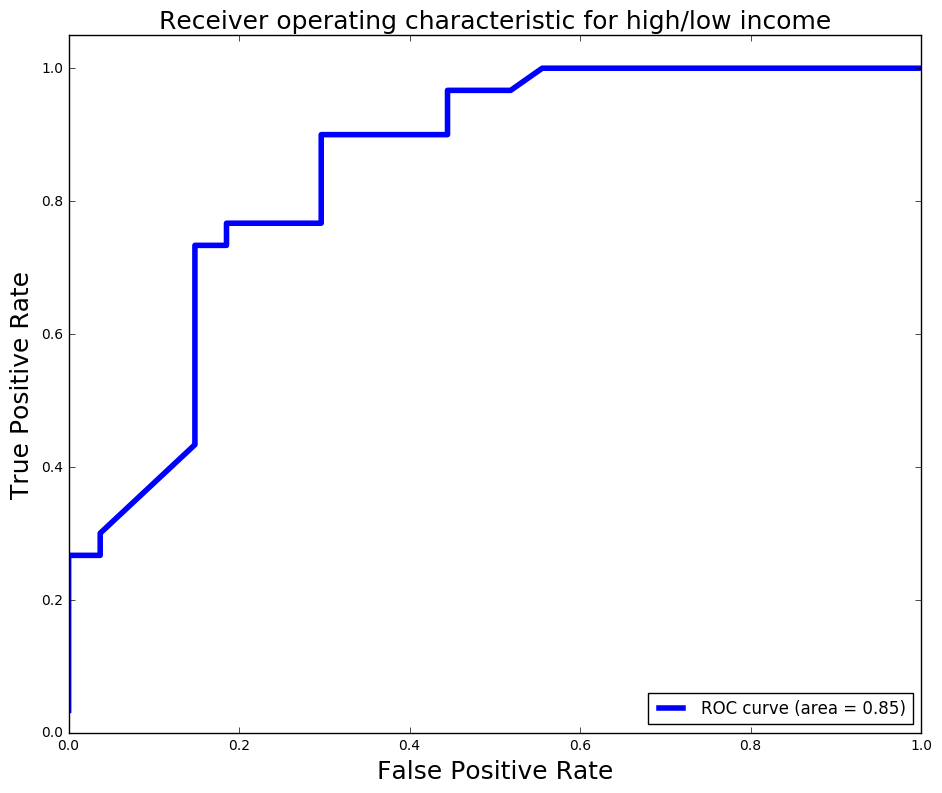

In [61]:
""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
#plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()